# **Traffic sign recognition: Image Classification**

## **Task Description**
Develop a pipeline for traffic sign recognition that performs the following tasks:

*   Data Loading and Feature Extraction: Load the dataset, preprocess the images, and extract features.
*   Data Exploration and Preprocessing: Explore the dataset and perform necessary preprocessing.
*   CNN Model Building: Build and evaluate a Convolutional Neural Network (CNN) model using Keras.
*   Transfer Learning: Use a pre-trained model for the classification task.
*   Comparison: Compare the performance of both models using appropriate visualization techniques.

*   Bonus Task: Live Demo - Upload a Test Image and Give Predictions

## **Dataset**
The data for this mini-project is from the German Traffic Sign Detection Benchmark "https://benchmark.ini.rub.de/gtsdb_dataset.html".

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that only use the images inside the image sections subfolders, containing only the traffic signs.

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

## **Data Loading and Feature Extraction**

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [2]:
# YOUR CODE HERE
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [3]:
base_path = '/content/FullIJCNN2013'
images_path = os.path.join(base_path)
labels_csv_path = os.path.join(base_path, 'gt.txt')  # assuming this is the ground truth CSV file


In [4]:
labels_df = pd.read_csv(labels_csv_path, sep=';', header=None)
labels_df.columns = ['filename', 'x1', 'y1', 'x2', 'y2', 'label']


In [5]:

print(labels_df.head())
print(labels_df.info())

    filename   x1   y1    x2   y2  label
0  00000.ppm  774  411   815  446     11
1  00001.ppm  983  388  1024  432     40
2  00001.ppm  386  494   442  552     38
3  00001.ppm  973  335  1031  390     13
4  00002.ppm  892  476  1006  592     39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1213 non-null   object
 1   x1        1213 non-null   int64 
 2   y1        1213 non-null   int64 
 3   x2        1213 non-null   int64 
 4   y2        1213 non-null   int64 
 5   label     1213 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 57.0+ KB
None


In [6]:
print("Contents of the image sections directory:")
print(os.listdir(images_path))

Contents of the image sections directory:
['00742.ppm', '00432.ppm', '00716.ppm', '00034.ppm', '00201.ppm', '00619.ppm', '00623.ppm', '00503.ppm', '00219.ppm', '00660.ppm', '00081.ppm', '00827.ppm', '00477.ppm', '00590.ppm', '00363.ppm', '00171.ppm', '00268.ppm', '00231.ppm', '00734.ppm', '00138.ppm', '30', '00396.ppm', '00788.ppm', '00751.ppm', '00101.ppm', '00566.ppm', '00611.ppm', '00697.ppm', '00785.ppm', '00216.ppm', '00160.ppm', '00076.ppm', '00110.ppm', '00438.ppm', '00476.ppm', '00744.ppm', '00823.ppm', '00529.ppm', '00000.ppm', '24', '00091.ppm', '00137.ppm', '00540.ppm', '00106.ppm', '00805.ppm', '00480.ppm', '00041.ppm', '00873.ppm', '00190.ppm', '00845.ppm', '00223.ppm', '00589.ppm', '00204.ppm', '00833.ppm', '00568.ppm', '00789.ppm', '00602.ppm', '00060.ppm', '00242.ppm', '00214.ppm', '00876.ppm', '00701.ppm', '00066.ppm', '00302.ppm', '00681.ppm', '00560.ppm', '00048.ppm', '00776.ppm', '35', '00368.ppm', '00723.ppm', '00040.ppm', '00316.ppm', '00025.ppm', '00510.ppm', '00

In [7]:
sample_image_file = os.path.join(images_path, labels_df.iloc[0]['filename'])
print(f"Sample image path: {sample_image_file}")
img = cv2.imread(sample_image_file)
if img is not None:
    print("Sample image read successfully")
else:
    print("Failed to read sample image")

Sample image path: /content/FullIJCNN2013/00000.ppm
Sample image read successfully


In [8]:
image_size = (30, 30)
images = []
labels = []

for index, row in labels_df.iterrows():
    image_file = os.path.join(images_path, row['filename'])
    img = cv2.imread(image_file)
    if img is not None:
        # Crop the image section containing the traffic sign
        img_section = img[row['y1']:row['y2'], row['x1']:row['x2']]
        resized_img = cv2.resize(img_section, image_size)
        images.append(resized_img)
        labels.append(row['label'])
    else:
        print(f"Image not found or could not be read: {image_file}")

images = np.array(images)
labels = np.array(labels)

In [9]:
print(f'Number of rows in CSV: {len(labels_df)}')
print(f'Number of images read: {len(images)}')



Number of rows in CSV: 1213
Number of images read: 1213


In [10]:
if len(labels) > 0:
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
else:
    print("No labels to transform")


In [11]:
images = images.astype('float32') / 255.0


In [12]:
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: (1213, 30, 30, 3)
Labels shape: (1213, 43)


## **Data Exploration and Preprocessing**

#### Plot the sample image of each class

Hint: plt.subplot

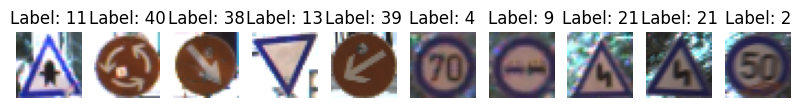

In [13]:
# YOUR CODE HERE
def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis("off")
    plt.show()

visualize_images(images, labels)

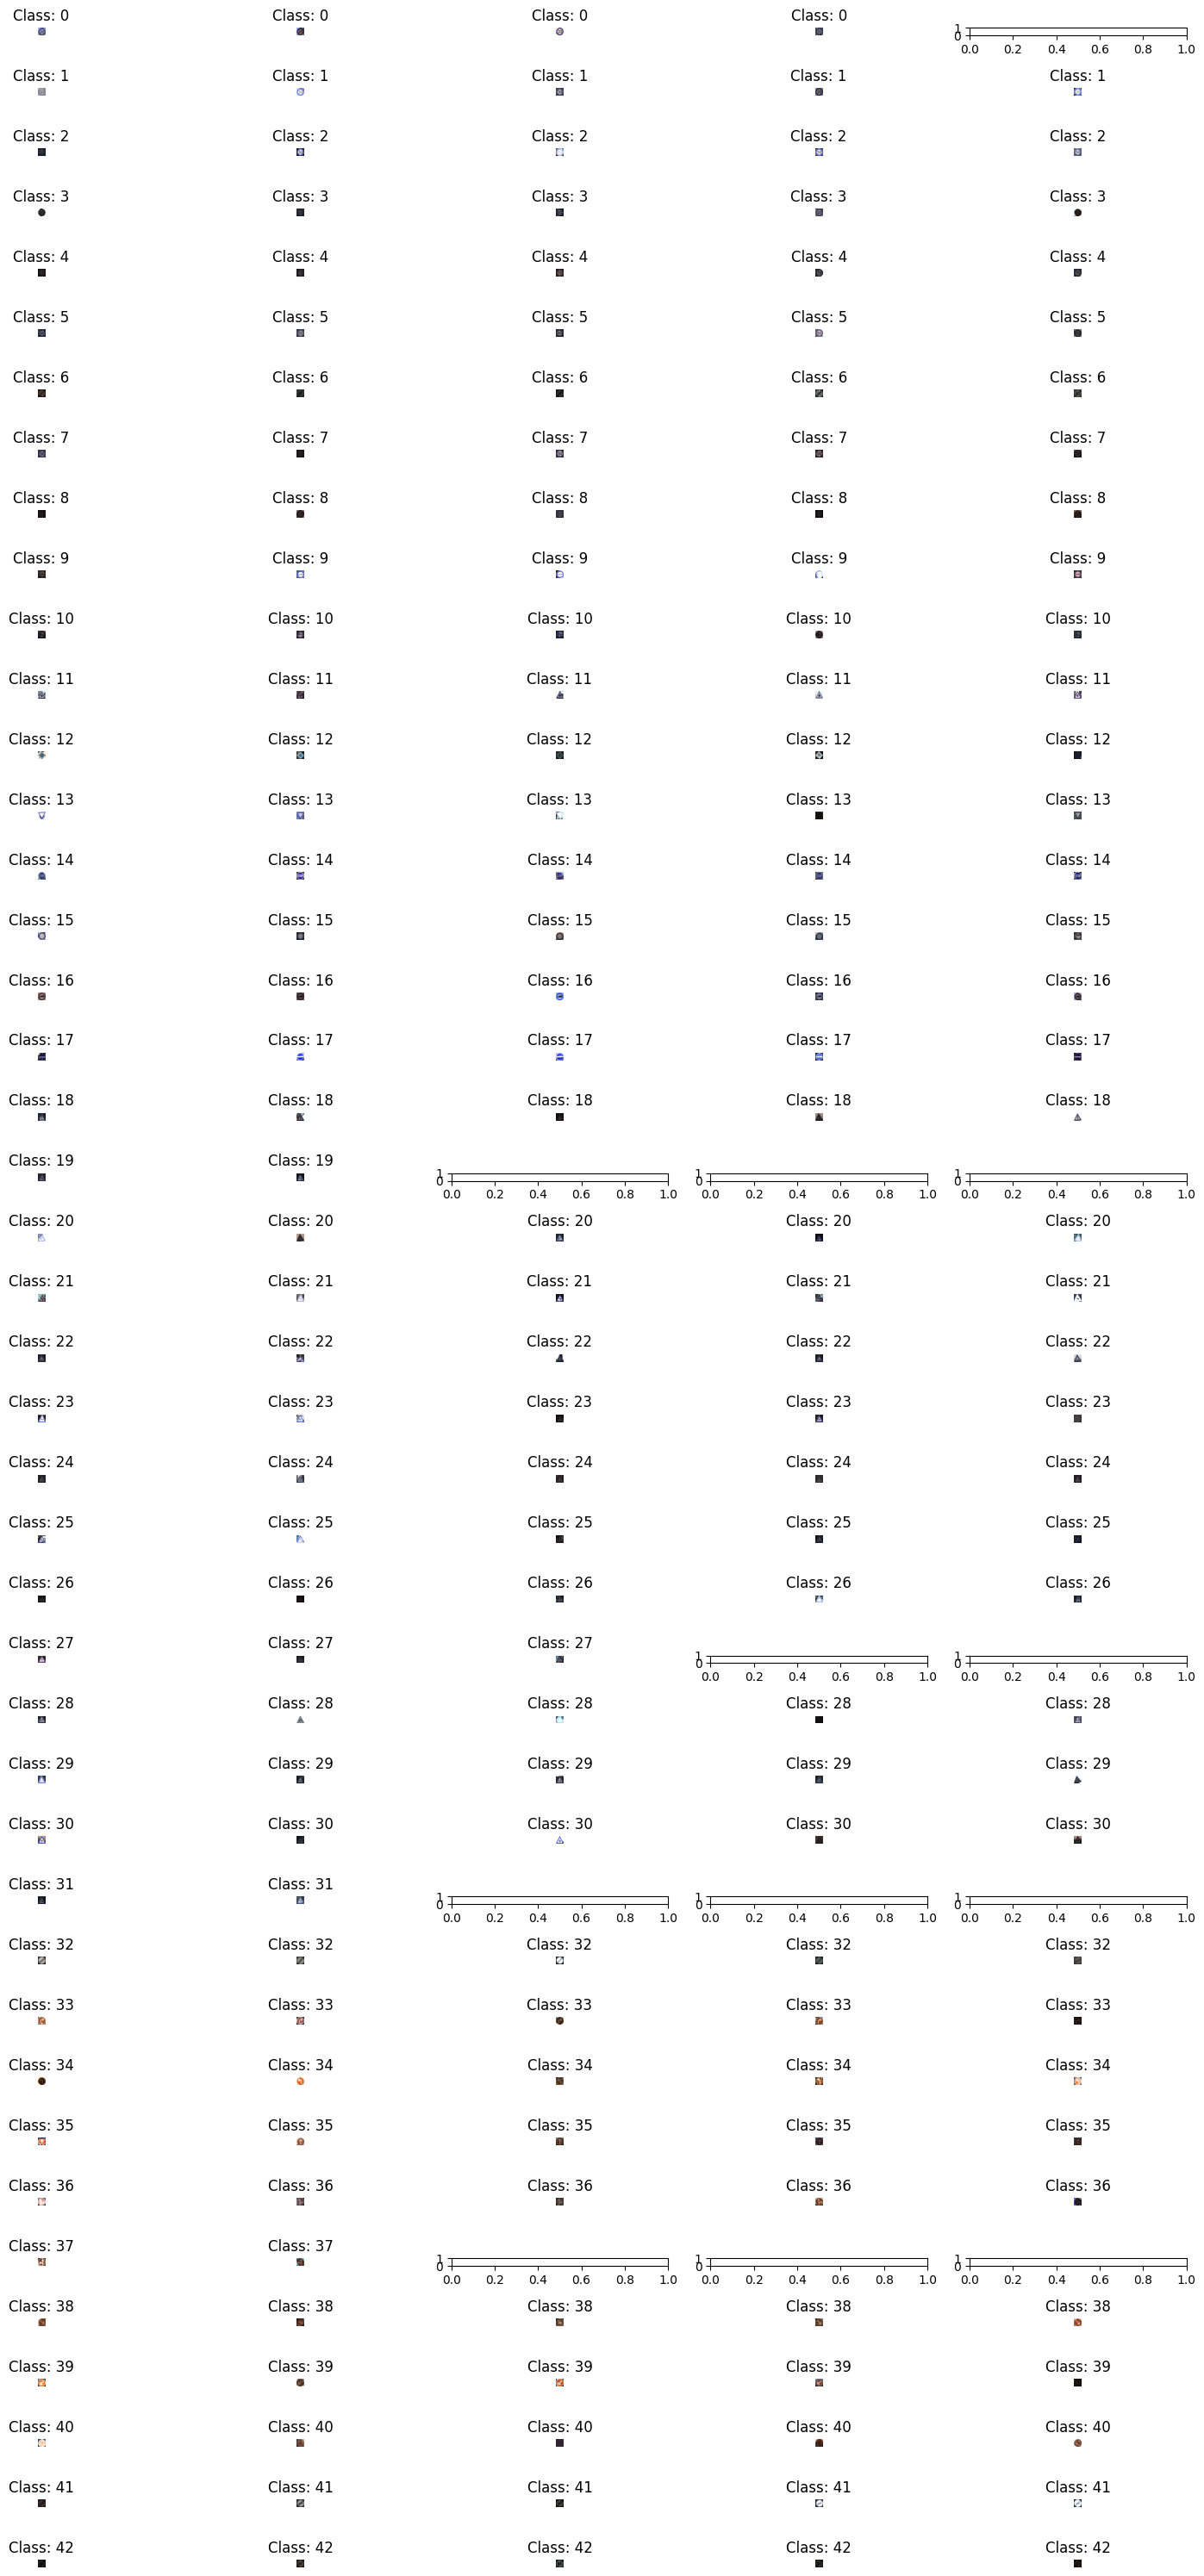

In [14]:
import matplotlib.pyplot as plt

# Function to visualize each class with its sample
def visualize_classes(images, labels, label_names, num_samples=1):
    num_classes = labels.shape[1]
    fig, axes = plt.subplots(num_classes, num_samples, figsize=(15, 30))

    for i in range(num_classes):
        class_indices = np.where(labels[:, i] == 1)[0]
        class_samples = np.random.choice(class_indices, min(num_samples, len(class_indices)), replace=False)

        for j, sample_idx in enumerate(class_samples):
            ax = axes[i, j]
            ax.imshow(images[sample_idx])
            ax.set_title(f"Class: {label_names[i]}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have label names available, replace this with your actual label names
label_names = np.arange(43)  # Example label names from 0 to 42

# Visualize classes with samples
visualize_classes(images, labels, label_names, num_samples=5)


<ipython-input-15-1cd1ee66c18b>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


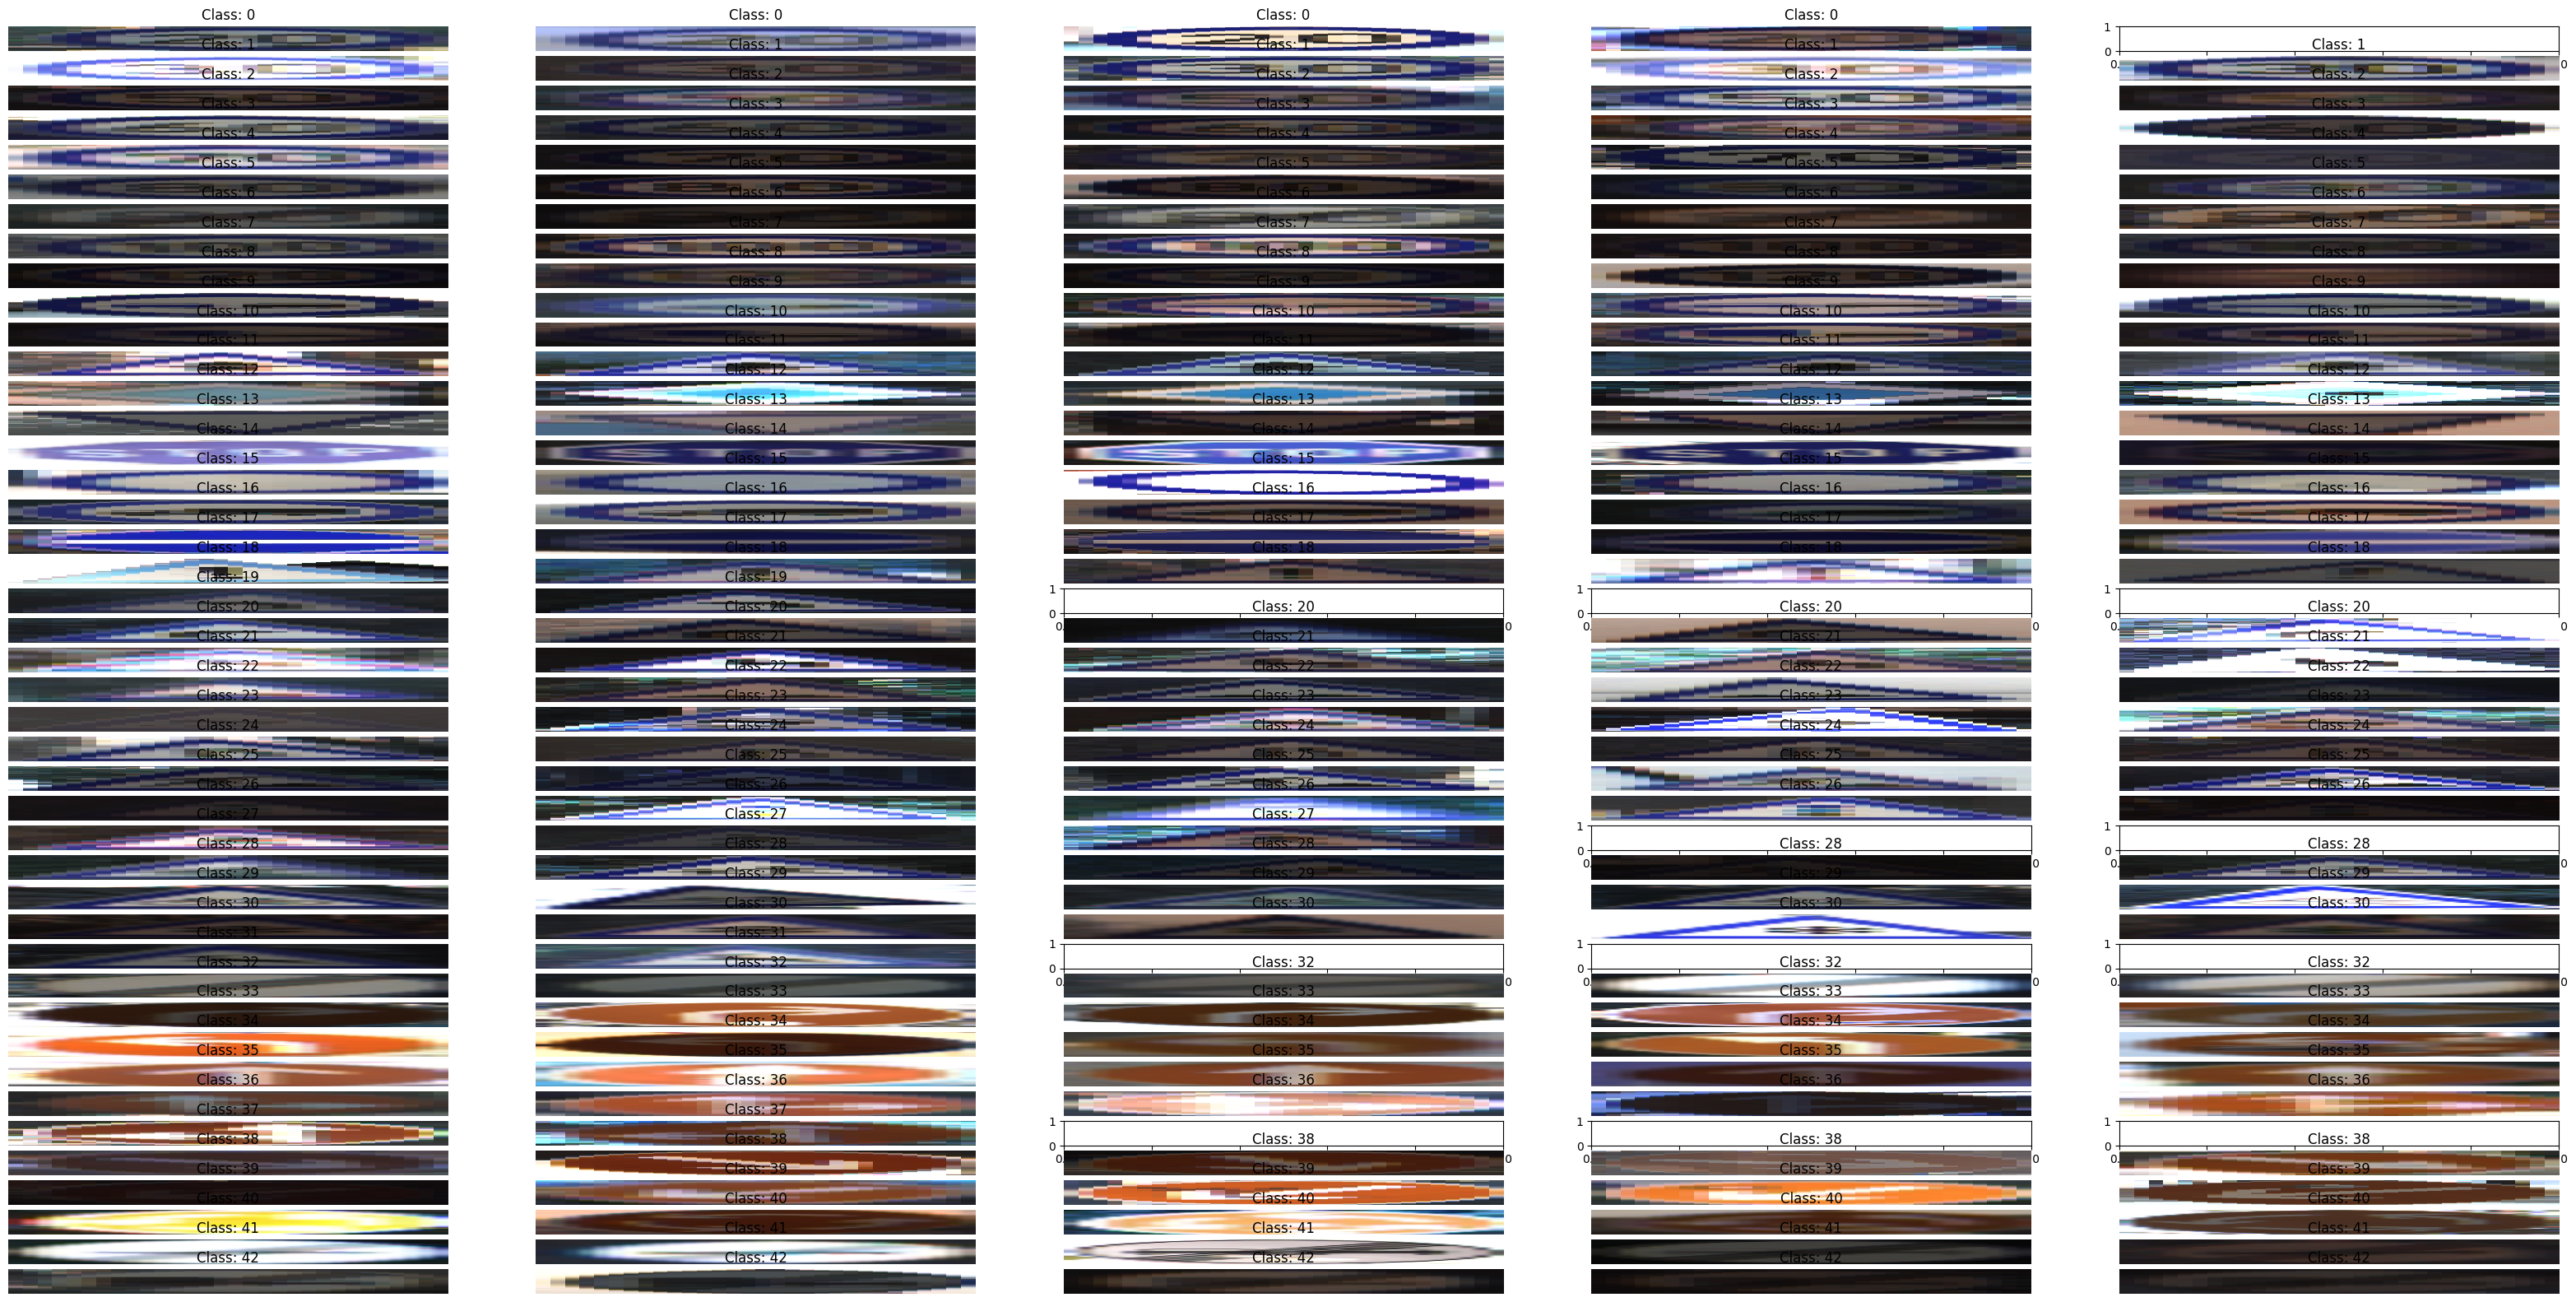

In [15]:
import matplotlib.pyplot as plt

# Function to visualize each class with its sample
def visualize_classes(images, labels, label_names, num_samples=5, figsize=(15, 30), img_size=(30, 30)):
    num_classes = labels.shape[1]
    fig, axes = plt.subplots(num_classes, num_samples, figsize=figsize)

    for i in range(num_classes):
        class_indices = np.where(labels[:, i] == 1)[0]
        class_samples = np.random.choice(class_indices, min(num_samples, len(class_indices)), replace=False)

        for j, sample_idx in enumerate(class_samples):
            ax = axes[i, j]
            ax.imshow(images[sample_idx])
            ax.set_title(f"Class: {label_names[i]}")
            ax.axis('off')
            ax.set_aspect('auto')  # Ensure aspect ratio is auto-adjusted

    plt.tight_layout()
    plt.show()

# Assuming you have label names available, replace this with your actual label names
label_names = np.arange(43)  # Example label names from 0 to 42

# Visualize classes with samples (adjust figsize and num_samples as needed)
visualize_classes(images, labels, label_names, num_samples=5, figsize=(40, 20), img_size=(50, 50))


#### Plot the distribution of Classes

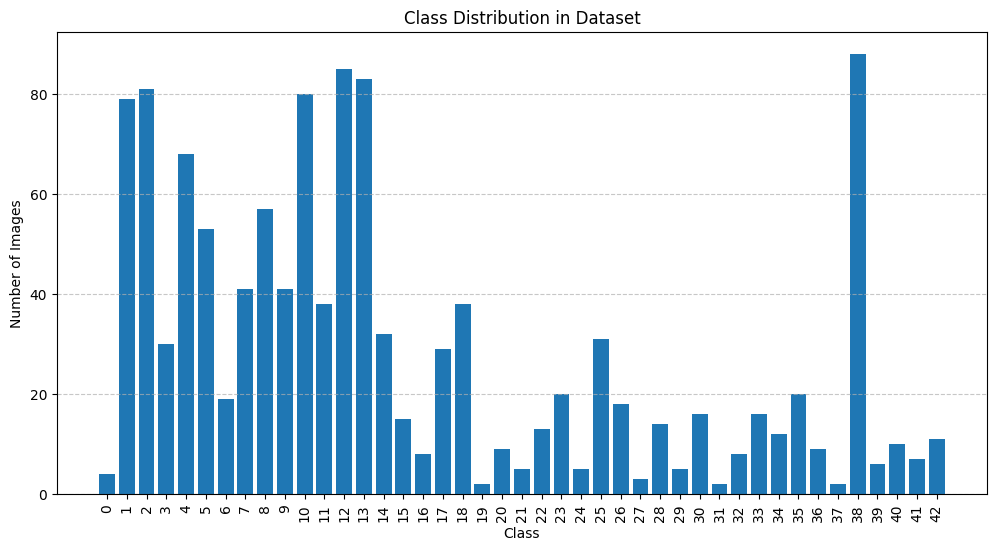

In [16]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(labels, label_names):
    # Count number of occurrences for each class
    class_counts = np.sum(labels, axis=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(label_names, class_counts, tick_label=label_names)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Dataset')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Assuming you have label names available, replace this with your actual label names
label_names = np.arange(43)  # Example label names from 0 to 42

# Plot class distribution
plot_class_distribution(labels, label_names)


**Implementing data augmentation for removing data imbalance.**

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Select classes for augmentation
augmented_classes = [19, 31, 37]

# Initialize lists to store augmented data
augmented_images = []
augmented_labels = []

# Apply data augmentation selectively
for i in range(len(images)):
    img = images[i]
    lbl = labels[i]

    # Check if the label corresponds to a class for augmentation
    if np.argmax(lbl) in augmented_classes:
        # Expand dimensions to fit generator
        img = np.expand_dims(img, axis=0)

        # Generate augmented images
        aug_iter = datagen.flow(img, batch_size=1)
        aug_images = [next(aug_iter)[0].astype(np.float32) for _ in range(250)]  # Generate 5 augmented images per original

        # Append original and augmented images to list
        augmented_images.extend(aug_images)
        augmented_labels.extend([lbl] * len(aug_images))
    else:
        # Append original image and label without augmentation
        augmented_images.append(img)
        augmented_labels.append(lbl)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Optionally, concatenate original images with augmented images
final_images = np.concatenate([images, augmented_images], axis=0)
final_labels = np.concatenate([labels, augmented_labels], axis=0)

print(f'Final images shape: {final_images.shape}')
print(f'Final labels shape: {final_labels.shape}')


Final images shape: (3920, 30, 30, 3)
Final labels shape: (3920, 43)


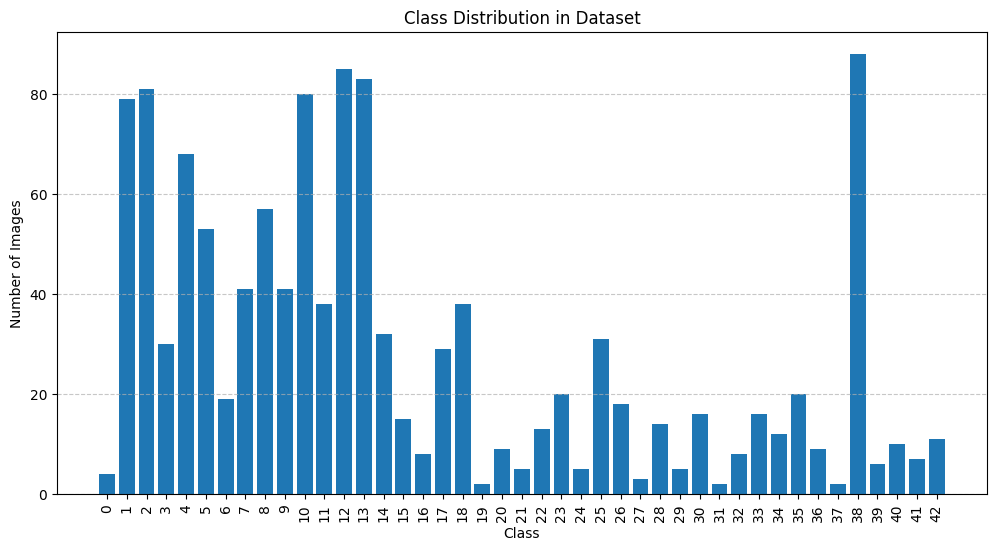

In [18]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(labels, label_names):
    # Count number of occurrences for each class
    class_counts = np.sum(labels, axis=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(label_names, class_counts, tick_label=label_names)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Dataset')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Assuming you have label names available, replace this with your actual label names
label_names = np.arange(43)  # Example label names from 0 to 42

# Plot class distribution
plot_class_distribution(labels, label_names)


## Build the CNN model using Keras


Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [19]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_images, final_labels, test_size=0.2, random_state=42)

In [20]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax')  # Assuming 43 classes for output layer
])

In [21]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [23]:
# Train the model
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
98/98 [==============================] - 6s 9ms/step - loss: 2.9168 - accuracy: 0.2436 - val_loss: 2.4379 - val_accuracy: 0.3355
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 2.1499 - accuracy: 0.3916 - val_loss: 1.7137 - val_accuracy: 0.5395
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 1.4724 - accuracy: 0.5708 - val_loss: 1.0327 - val_accuracy: 0.7130
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 0.9359 - accuracy: 0.7242 - val_loss: 0.6792 - val_accuracy: 0.8163
Epoch 5/20
98/98 [==============================] - 1s 6ms/step - loss: 0.6195 - accuracy: 0.8211 - val_loss: 0.3650 - val_accuracy: 0.8954
Epoch 6/20
98/98 [==============================] - 1s 7ms/step - loss: 0.4117 - accuracy: 0.8833 - val_loss: 0.2451 - val_accuracy: 0.9401
Epoch 7/20
98/98 [==============================] - 1s 7ms/step - loss: 0.3010 - accuracy: 0.9110 - val_loss: 0.2216 - val_accuracy: 0.9452
Epoch 8/20
98/98 [==

In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


25/25 - 0s - loss: 0.0284 - accuracy: 0.9898 - 75ms/epoch - 3ms/step
Test accuracy: 0.9897959232330322


In [25]:
# Example: Select the first image from the dataset as a test image
test_image_index = 12
test_image = final_images[test_image_index]
test_label = final_labels[test_image_index]


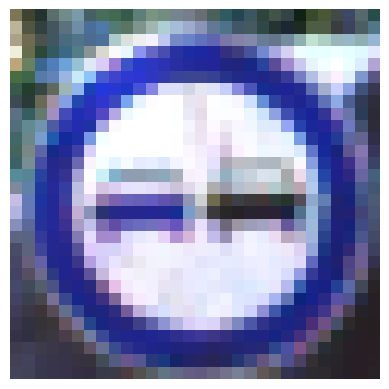

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape the test image to add batch dimension (if necessary)
test_image_input = np.expand_dims(test_image, axis=0)

# Display the test image
plt.imshow(test_image)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 298ms/step
True Label: 9
Predicted Label: 9


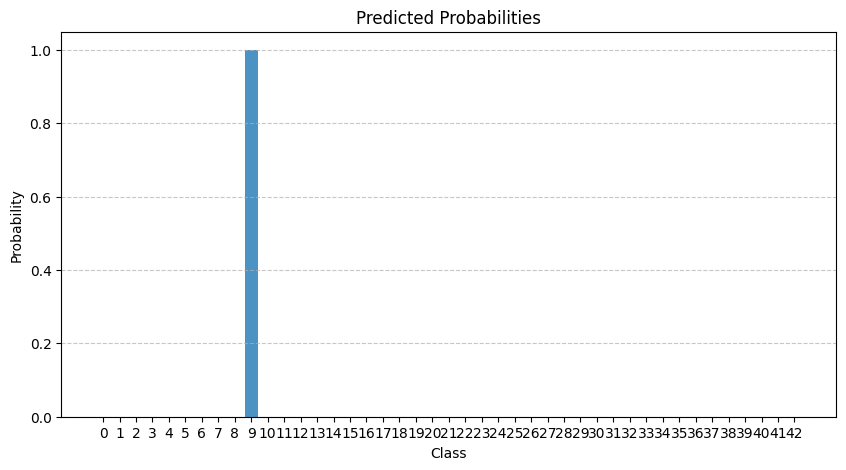

In [27]:
# Make predictions with the model
predictions = model1.predict(test_image_input)

# Assuming 'label_names' contains your class names or labels
# Replace with your actual label names if available
label_names = np.arange(43)  # Example label names from 0 to 42

# Get the predicted class index with highest probability
predicted_class_index = np.argmax(predictions)

# Map the predicted class index to its corresponding label name
predicted_label = label_names[predicted_class_index]

# Map the true label index to its corresponding label name
true_class_index = np.argmax(test_label)
true_label = label_names[true_class_index]

print(f'True Label: {true_label}')
print(f'Predicted Label: {predicted_label}')

# Optionally, visualize predicted probabilities
plt.figure(figsize=(10, 5))
plt.bar(label_names, predictions[0], alpha=0.8)
plt.xticks(label_names)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Probabilities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Transfer Learning: Use the pre-trained models**

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

Task-flow
* Initialize the network with the weights of pretrained model
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

**I will implement a pre-trained model for enhancing the accuracy**

# Resnet Architecture

In [28]:
import cv2
import numpy as np

# Resize images to 32x32 pixels
resized_images = np.array([cv2.resize(img, (32, 32)) for img in final_images])

# Check the new shape
print(f'New images shape: {resized_images.shape}')


New images shape: (3920, 32, 32, 3)


In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, final_labels, test_size=0.2, random_state=42)


In [30]:
# YOUR CODE HERE
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)  # Assuming 43 classes

# Define the complete model
model2 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model2.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()



94765736/94765736 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [31]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
98/98 [==============================] - 11s 50ms/step - loss: 3.3971 - accuracy: 0.1614 - val_loss: 3.0764 - val_accuracy: 0.2270
Epoch 2/100
98/98 [==============================] - 2s 19ms/step - loss: 3.0850 - accuracy: 0.2082 - val_loss: 2.9691 - val_accuracy: 0.2181
Epoch 3/100
98/98 [==============================] - 1s 12ms/step - loss: 2.9804 - accuracy: 0.2328 - val_loss: 2.8727 - val_accuracy: 0.2258
Epoch 4/100
98/98 [==============================] - 1s 12ms/step - loss: 2.8939 - accuracy: 0.2382 - val_loss: 2.8038 - val_accuracy: 0.2730
Epoch 5/100
98/98 [==============================] - 1s 12ms/step - loss: 2.8165 - accuracy: 0.2513 - val_loss: 2.7438 - val_accuracy: 0.2398
Epoch 6/100
98/98 [==============================] - 1s 13ms/step - loss: 2.7587 - accuracy: 0.2634 - val_loss: 2.6487 - val_accuracy: 0.2615
Epoch 7/100
98/98 [==============================] - 1s 13ms/step - loss: 2.7121 - accuracy: 0.2797 - val_loss: 2.6353 - val_accuracy: 0.3036
Epoch

In [32]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

25/25 - 0s - loss: 1.3441 - accuracy: 0.6020 - 344ms/epoch - 14ms/step
Test accuracy: 0.6020408272743225


In [33]:
# Unfreeze some layers of the base model
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model2.compile(optimizer=Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_fine = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the fine-tuned model on the test set
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy after fine-tuning: {test_acc}')


Epoch 1/10
98/98 [==============================] - 11s 28ms/step - loss: 3.4826 - accuracy: 0.2946 - val_loss: 3.8883 - val_accuracy: 0.1416
Epoch 2/10
98/98 [==============================] - 2s 17ms/step - loss: 2.1079 - accuracy: 0.3772 - val_loss: 4.0089 - val_accuracy: 0.1926
Epoch 3/10
98/98 [==============================] - 2s 17ms/step - loss: 1.9412 - accuracy: 0.4117 - val_loss: 11.3748 - val_accuracy: 0.0765
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.7942 - accuracy: 0.4378 - val_loss: 2.8673 - val_accuracy: 0.1913
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.7987 - accuracy: 0.4522 - val_loss: 13.6260 - val_accuracy: 0.1339
Epoch 6/10
98/98 [==============================] - 2s 17ms/step - loss: 1.8414 - accuracy: 0.4630 - val_loss: 6.4178 - val_accuracy: 0.1977
Epoch 7/10
98/98 [==============================] - 2s 20ms/step - loss: 1.6491 - accuracy: 0.4844 - val_loss: 2.6242 - val_accuracy: 0.3457
Epoch 8/10

In [34]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax', kernel_regularizer=l2(0.01))(x)

# Define the complete model
model2 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model2.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Early stopping


# Train the model
history2 = model2.fit(X_train, y_train, batch_size=32,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    )


Epoch 1/50
98/98 [==============================] - 7s 38ms/step - loss: 4.6658 - accuracy: 0.1540 - val_loss: 3.5865 - val_accuracy: 0.1288
Epoch 2/50
98/98 [==============================] - 2s 22ms/step - loss: 3.5026 - accuracy: 0.2047 - val_loss: 3.3655 - val_accuracy: 0.1964
Epoch 3/50
98/98 [==============================] - 2s 23ms/step - loss: 3.3458 - accuracy: 0.2095 - val_loss: 3.2208 - val_accuracy: 0.2283
Epoch 4/50
98/98 [==============================] - 2s 18ms/step - loss: 3.2366 - accuracy: 0.2181 - val_loss: 3.1768 - val_accuracy: 0.1926
Epoch 5/50
98/98 [==============================] - 1s 12ms/step - loss: 3.1402 - accuracy: 0.2286 - val_loss: 3.0422 - val_accuracy: 0.2270
Epoch 6/50
98/98 [==============================] - 1s 12ms/step - loss: 3.0910 - accuracy: 0.2328 - val_loss: 2.9936 - val_accuracy: 0.2347
Epoch 7/50
98/98 [==============================] - 1s 12ms/step - loss: 3.0554 - accuracy: 0.2408 - val_loss: 2.9610 - val_accuracy: 0.2577
Epoch 8/50
98

## **Compare test results of both models using appropriate visualisation**

**bold text**

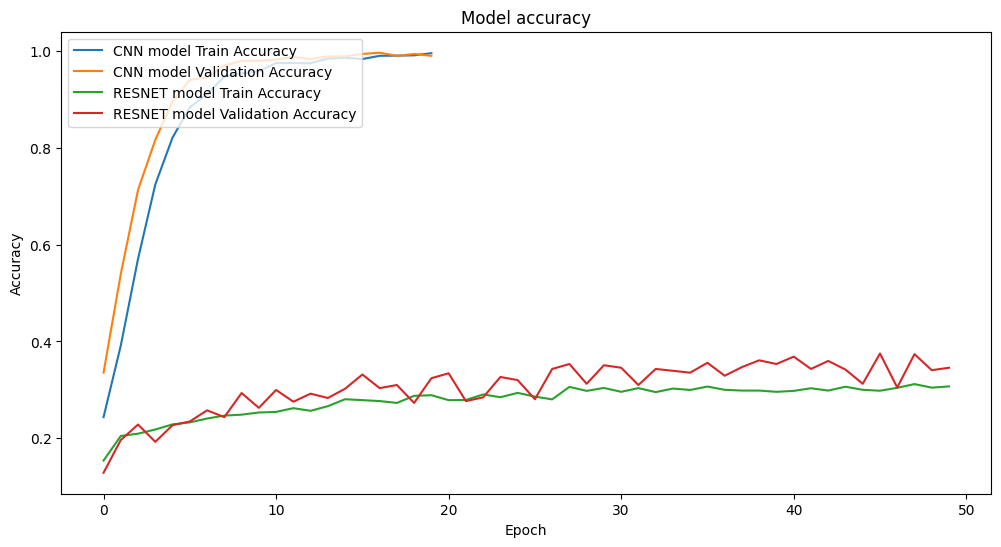

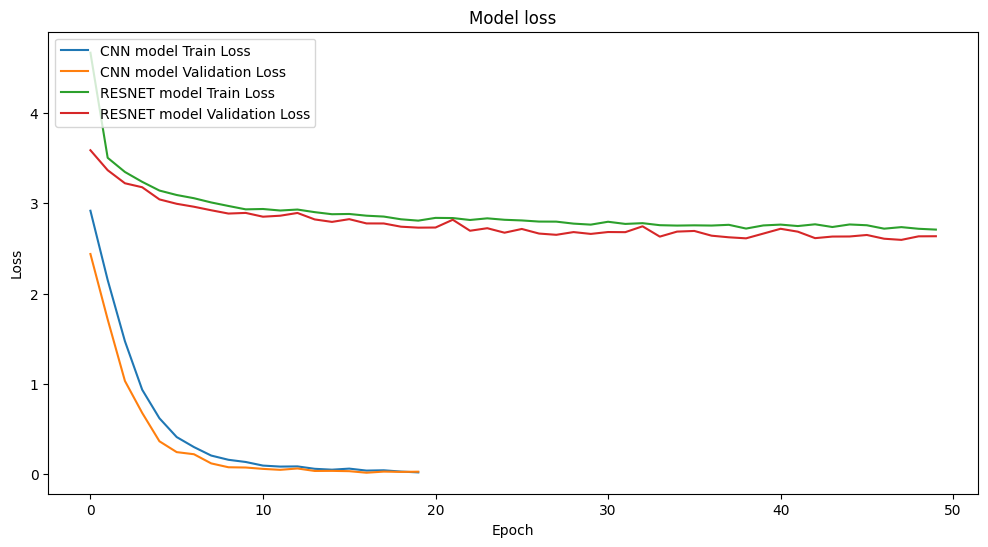

In [36]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Assuming history1 and history2 contain the training history of model1 and model2 respectively

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label='CNN model Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='CNN model Validation Accuracy')
plt.plot(history2.history['accuracy'], label='RESNET model Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='RESNET model Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='CNN model Train Loss')
plt.plot(history1.history['val_loss'], label='CNN model Validation Loss')
plt.plot(history2.history['loss'], label='RESNET model Train Loss')
plt.plot(history2.history['val_loss'], label='RESNET model Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


As CNN model surpasses RESNET50 model, we'll proceed with the CNN architecture.

# **Bonus Task**

**Live Demo - Upload a Test Image and Give Predictions**




*   Create a simple web interface using a web framework like Flask or Streamlit.
*   Include an upload feature for users to upload a test image.
*   Process the uploaded image to detect and classify traffic signs.
*   Use your trained model from the main assignment to predict the class of detected traffic signs.

*   Display Predictions
*   Include error handling for invalid image formats or other issues.





In [37]:
# YOUR CODE HERE

model1.save('traffic_sign_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
